# Logistic Regression: What and Why?

**Logistic Regression is a classification algorithm used to predict the outcome of a categorical dependent variable. It produces results in a binary format, meaning the output is discrete rather than continuous.**

It is typically used when the target variable has two possible outcomes, such as:

- 0 or 1

- Yes or No

- True or False

- High or Low

**Logistic Regression estimates the probability that a given input belongs to a particular class and assigns the label based on that probability.**

# Why Not Linear Regression for Classification

Linear regression is not ideal for classification tasks because it predicts continuous values. In binary classification, the output must be between 0 and 1. Linear regression does not naturally restrict predictions to this range, which can lead to values less than 0 or greater than 1. Clipping these values is not reliable for decision making. Because of this limitation, logistic regression, which uses a sigmoid function to keep outputs between 0 and 1, is preferred.

- We get a Sigmod curve as a result
- Threshold value will be fixed so that it can be classified easily

# Logistic Regression Curve

- Logistic Regression uses the sigmoid function to convert predictions into probabilities between 0 and 1.

- The sigmoid curve has an S shape, rising slowly at first, then faster, and finally leveling off.

- The output of the sigmoid represents the probability of belonging to a particular class.

- A threshold value (commonly 0.5) is used to turn probabilities into class labels.

- Values above the threshold are classified as class 1, and values below it are classified as class 0.

- This threshold helps decide outcomes such as win or lose, yes or no, or true or false.

# Logistic Regression Equation: 

- Logistic Regression starts from the straight line equation:
Y = C + B1X1 + B2X2 + …

- Linear regression outputs values from minus infinity to plus infinity.

- Logistic Regression requires outputs between 0 and 1 because it predicts probabilities.

- To convert Y into a 0 to infinity range, the transformation Y / (1 − Y) is used.

- Applying the logarithm gives the logit function:
log(Y / (1 − Y)) = C + B1X1 + B2X2 + …

- This becomes the final Logistic Regression equation, which maps linear combinations of inputs to probability values.

# Logistic Regression: Use Cases

- Used for predicting binary outcomes such as illness detection.

- Helps in classifying objects into categories, for example types of animals.

- Applied in medical diagnosis systems, such as MRI based disease prediction.

- Useful in weather based classification tasks such as predicting rain or no rain.

## Step by step Implementation

### Step-1: Import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Collecting the Data 

In [7]:
titanic_data = pd.read_csv("Titanic.csv")

In [9]:
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [10]:
print("# of passengers in original data:" +str(len(titanic_data.index)))

# of passengers in original data:891


### Step-2: Analyzing Data

<Axes: xlabel='survived', ylabel='count'>

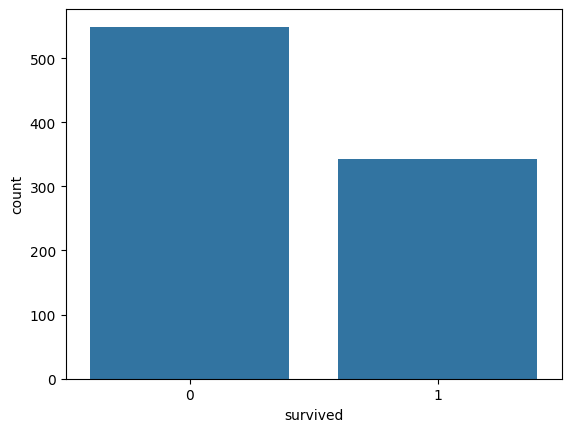

In [14]:
sns.countplot(x="survived" , data = titanic_data)

<Axes: xlabel='survived', ylabel='count'>

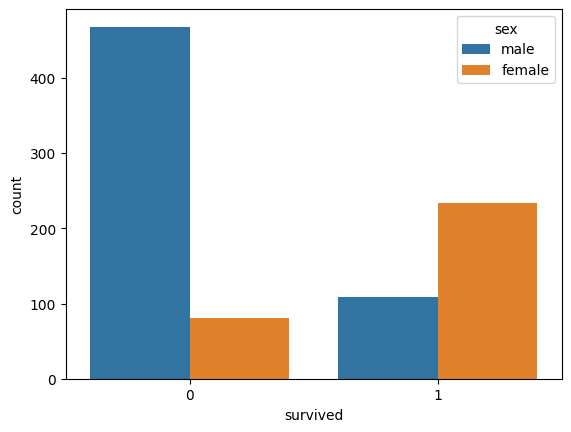

In [15]:
sns.countplot(x = 'survived' , hue = 'sex' , data = titanic_data)

<Axes: xlabel='survived', ylabel='count'>

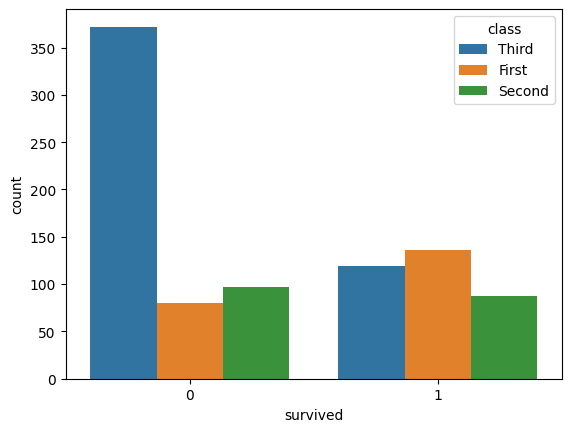

In [17]:
sns.countplot(x = 'survived' , hue = 'class' , data = titanic_data)

<Axes: ylabel='Frequency'>

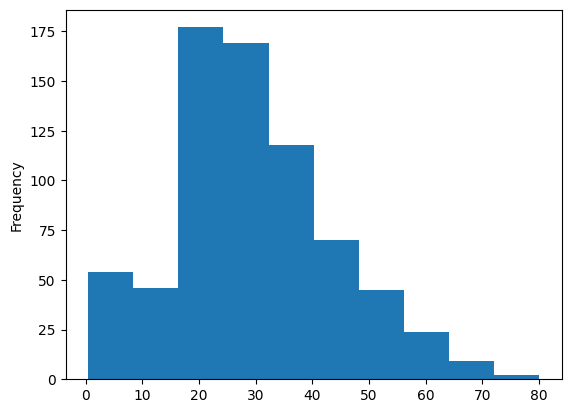

In [18]:
titanic_data['age'].plot.hist()

<Axes: ylabel='Frequency'>

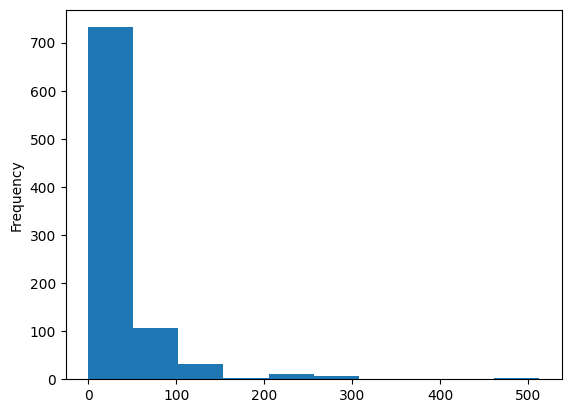

In [22]:
titanic_data['fare'].plot.hist()

In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [25]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='sibsp', ylabel='count'>

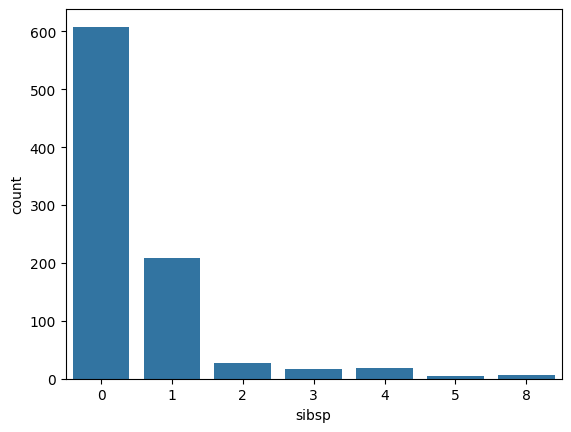

In [28]:
sns.countplot(x = 'sibsp' , data = titanic_data)

<Axes: xlabel='parch', ylabel='count'>

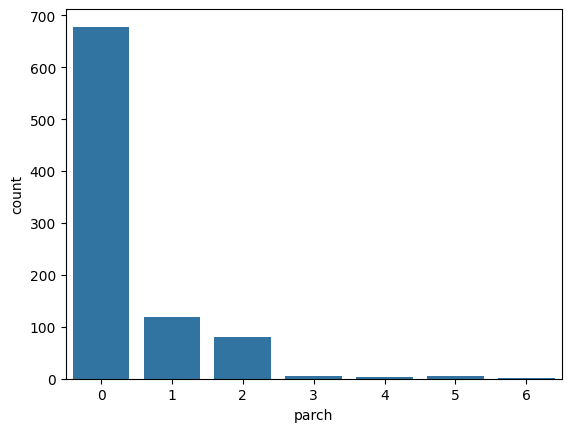

In [29]:
sns.countplot(x = 'parch' , data = titanic_data)

### Step-3: Data Cleaning

In [31]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

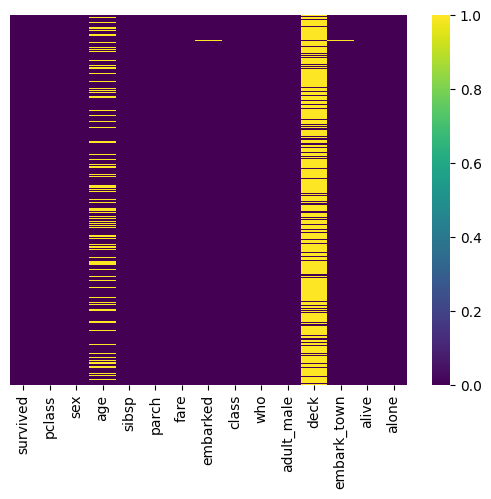

In [34]:
sns.heatmap(titanic_data.isnull(), yticklabels=False , cmap="viridis")

<Axes: xlabel='pclass', ylabel='age'>

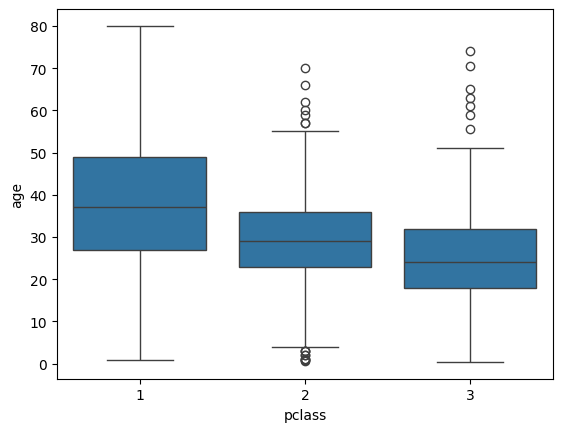

In [36]:
sns.boxplot(x = "pclass" , y="age" , data=titanic_data)

In [37]:
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
titanic_data.drop('deck',axis =1 , inplace= True)

In [39]:
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [41]:
titanic_data.dropna(inplace = True)
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [44]:
titanic_data.isnull().sum()  # Now all null elements are removed

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

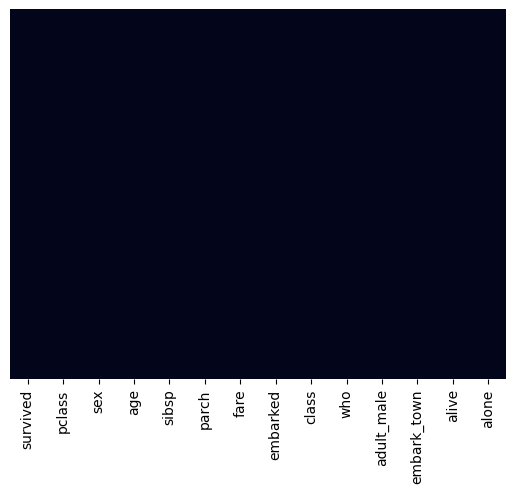

In [47]:
sns.heatmap(titanic_data.isnull(),yticklabels=False , cbar = False) # Rechecking for null values no values seen 

In [48]:
titanic_data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [58]:
sex=pd.get_dummies(titanic_data['sex'], drop_first=True)
sex.head(5)

,male
0,True
1,False
2,False
3,False
4,True


In [61]:
embark = pd.get_dummies(titanic_data['embarked'], drop_first=True)
embark.head(5)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [62]:
pclass = pd.get_dummies(titanic_data['pclass'], drop_first=True)
pclass.head(5)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [65]:
titanic_data = pd.concat([titanic_data,sex ,embark ,pclass],axis =1)
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,male,Q,S,2,3,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,True,False,True,False,True,True,False,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,False,False,False,False,False,False,False,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,False,False,True,False,True,False,False,True,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,False,False,True,False,False,False,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,True,False,True,False,True,True,False,True,False,True


In [68]:
titanic_data = titanic_data.replace({True: 1, False: 0})


C:\Users\range\AppData\Local\Temp\ipykernel_14736\211207487.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data = titanic_data.replace({True: 1, False: 0})


In [69]:
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,male,Q,S,2,3,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,1,0,1,0,1,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0,0,0,0,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,0,0,1,0,1,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,0,0,1,0,0,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,1,0,1,0,1,1,0,1,0,1


In [70]:
titanic_data.drop(['sex','embarked','class' , 'who'], axis =1 , inplace=True)

In [71]:
titanic_data.head(5)

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,male,Q,S,2,3,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,Southampton,no,0,1,0,1,0,1,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,Cherbourg,yes,0,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,Southampton,yes,1,0,0,1,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,Southampton,yes,0,0,0,1,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,Southampton,no,1,1,0,1,0,1,1,0,1,0,1


In [72]:
titanic_data.drop(['adult_male','embark_town','alive' , 'alone'], axis =1 , inplace=True)

In [73]:
titanic_data.head(5)

,survived,pclass,age,sibsp,parch,fare,male,Q,S,2,3,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1


In [78]:
titanic_data = titanic_data.loc[:, ~titanic_data.columns.duplicated()]

In [79]:
titanic_data.head(5)

,survived,pclass,age,sibsp,parch,fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [80]:
titanic_data.drop(['pclass'], axis =1 , inplace=True)

C:\Users\range\AppData\Local\Temp\ipykernel_14736\3656931476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data.drop(['pclass'], axis =1 , inplace=True)


In [81]:
titanic_data.head(5)

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


 ### Step-4: Train Data

In [91]:
X = titanic_data.drop('survived',axis = 1)
y = titanic_data['survived']

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [95]:
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state = 1)

In [100]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression()

In [107]:
X = X.rename(columns={2: 'class_2', 3: 'class_3'})

In [113]:
X.columns = X.columns.astype(str)

In [114]:
print(X.columns)


Index(['age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S', '2', '3'], dtype='object')


In [115]:
X = X.rename(columns={'2': 'pclass_2', '3': 'pclass_3'})

In [116]:
X.columns = X.columns.astype(str)

In [117]:
print(X.columns)

Index(['age', 'sibsp', 'parch', 'fare', 'male', 'Q', 'S', 'pclass_2',
       'pclass_3'],
      dtype='object')


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logmodel.fit(X_train, y_train)

C:\Users\range\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [119]:
predictions = logmodel.predict(X_test)

In [120]:
from sklearn.metrics import classification_report

In [121]:
classification_report(y_test , predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.88      0.83       122\n           1       0.81      0.70      0.75        92\n\n    accuracy                           0.80       214\n   macro avg       0.80      0.79      0.79       214\nweighted avg       0.80      0.80      0.80       214\n'

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test , predictions)

array([[107,  15],
       [ 28,  64]])

In [ ]:
from skle